In [1]:
import numpy as np
import xarray as xr
import os
from cdo import *
from cdo import Cdo
cdo = Cdo()

import geopandas as geo
import salem


#from scipy.stats import pearsonr
#from scipy.stats import linregress
#from scipy import signal
#import matplotlib.pyplot as plt

In [ ]:
reserve_shp = geo.read_file('/mnt/e/BaiduSyncdisk/lunwen/毕设的糟心玩意/华北国家级保护区shp/华北保护区.shp')


In [11]:
dongbei_shp  = geo.read_file('/mnt/d/work/hxm/dongsansheng/dongsansheng.shp')
data = xr.open_dataset('/mnt/d/work/hxm/lai_Lmon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc')
lai = data.lai
data_dongbei = lai.salem.roi(shape = dongbei_shp)
data_dongbei.to_netcdf(path = '/mnt/d/work/hxm/lai_dongbei.nc')

In [1]:
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif']=['Times New Roman']
import matplotlib 
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
previous_font = '   '
count = 0 
for font_name in a:
    if(font_name != previous_font):
        count = count + 1  
#         print(font_name, '\t\t\t\t', end='')
        if(count > 2): 
            print('{:35}'.format(font_name), end='') 
        if(count % 1 == 0):
            print()
        previous_font = font_name




DejaVu Sans Mono                   
DejaVu Serif                       
DejaVu Serif Display               
STIXGeneral                        
STIXNonUnicode                     
STIXSizeFiveSym                    
STIXSizeFourSym                    
STIXSizeOneSym                     
STIXSizeThreeSym                   
STIXSizeTwoSym                     
cmb10                              
cmex10                             
cmmi10                             
cmr10                              
cmss10                             
cmsy10                             
cmtt10                             


In [2]:
sudo apt-get install fontconfig
sudo apt install ttf-mscorefonts-installer


SyntaxError: invalid syntax (1668814613.py, line 1)

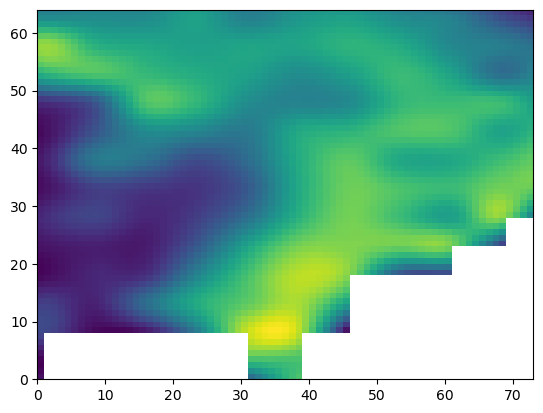

In [2]:
data = xr.open_dataset('/mnt/d/work/hxm/lai_Lmon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc')
plt.pcolormesh(data.lai[0])

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
lai_dongbei = xr.open_dataset('/mnt/d/work/hxm/lai_dongbei.nc')
plt.pcolormesh(lai_dongbei[0])

KeyError: 0

In [ ]:
cdo.sellonlatbox( '95,130,30,55', input = '/mnt/f/cn05/huabei_1982_2015/tmax_huabei_1982_2015.nc', output = '/mnt/f/cn05/huabei_1982_2015/cn05_huabei_tmax_1982_2015.nc')

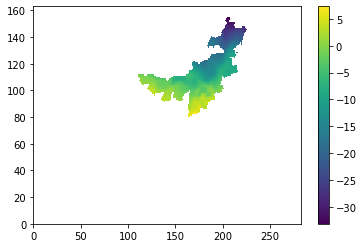

In [6]:
import matplotlib.pyplot as plt
plt.pcolormesh(tmaxhuabei.tmax[0,:],cmap = 'coolwarm')
plt.colorbar()

In [40]:
cdo.sellonlatbox( '95,130,30,55', input = '/mnt/f/cn05/huabei_1982_2015/tmax_huabei_1982_2015.nc', output = '/mnt/f/cn05/huabei_1982_2015/cn05_huabei_tmax_1982_2015.nc')

'/mnt/f/cn05/huabei_1982_2015/cn05_huabei_tmax_1982_2015.nc'

In [41]:
cn05_tmax_huabei=xr.open_dataset('/mnt/f/cn05/huabei_1982_2015/cn05_huabei_tmax_1982_2015.nc')

In [2]:
import os
path = '/mnt/f/cn05/Climite/out/'
filename = os.listdir(path)
filename

['cn05.1_pre_1982_2015.nc',
 'cn05.1_tmax_1982_2015.nc',
 'cn05.1_tmin_1982_2015.nc',
 'cn05.1_tm_1982_2015.nc']

In [4]:
shp  = geo.read_file('/mnt/f/cn05/huabeishp/output/huabei_area.shp')
path = '/mnt/f/cn05/Climite/out/'
filename = os.listdir(path)
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/Climite/out/',file)
    f = xr.open_dataset(inputfile)
    output = f.salem.roi(shape = shp)
    outputfile = os.path.join('/mnt/f/cn05/huabei_1982_2015/',"huabei" + file)
    output.to_netcdf(path = outputfile)

In [5]:
filename = os.listdir('/mnt/f/cn05/huabei_1982_2015/')
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/huabei_1982_2015/',file)
    outputfile = os.path.join('/mnt/f/cn05/cn05_huabei/', file)
    cdo.sellonlatbox( '95,130,30,55',input = inputfile ,output =outputfile)

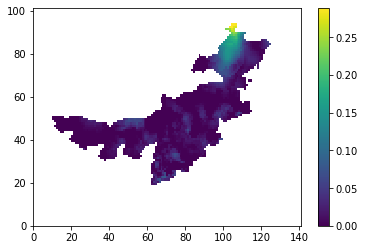

In [10]:
import matplotlib.pyplot as plt
cn05_tmax_huabei=xr.open_dataset('/mnt/f/cn05/cn05_huabei/huabeicn05.1_pre_1982_2015.nc')
plt.pcolormesh(cn05_tmax_huabei.pre[0,:],cmap = 'viridis')
plt.colorbar()

cn05出错，重新改pre数据

In [8]:
cdo.seldate( '1982-01-01,2015-12-31', input = '/mnt/f/cn05/new_pre/CN05.1_Pre_1961_2021_daily_025x025.nc', output = '/mnt/f/cn05/new_pre/new_pre_1982_2015.nc')

'/mnt/f/cn05/new_pre/new_pre_1982_2015.nc'

In [10]:
shp = geo.read_file('/mnt/f/cn05/huabeishp/output/huabei_area.shp')
new_pre=xr.open_dataset('/mnt/f/cn05/new_pre/new_pre_1982_2015.nc')
prehuabei = new_pre.salem.roi(shape = shp)
prehuabei.to_netcdf(path = '/mnt/f/cn05/new_pre/pre_huabei_1982_2015.nc')

/home/yqr/miniconda3/envs/python/lib/python3.8/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/home/yqr/miniconda3/envs/python/lib/python3.8/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [11]:
cdo.sellonlatbox( '95,130,30,55', input = '/mnt/f/cn05/new_pre/pre_huabei_1982_2015.nc', output = '/mnt/f/cn05/new_pre/pre_1982_2015.nc')

'/mnt/f/cn05/new_pre/pre_1982_2015.nc'

In [24]:
cn05_tmax_huabei=xr.open_dataset('/mnt/f/cn05/cn05_huabei/huabeicn05.1_pre_1982_2015.nc')
cn05_tmax_huabei

<xarray.Dataset>
Dimensions:  (time: 12418, lon: 141, lat: 101)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2015-12-31
  * lon      (lon) float64 95.0 95.25 95.5 95.75 ... 129.2 129.5 129.8 130.0
  * lat      (lat) float64 30.0 30.25 30.5 30.75 31.0 ... 54.25 54.5 54.75 55.0
Data variables:
    pre      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.4
    history:      Fri Apr 29 19:49:06 2022: cdo -O -s -sellonlatbox,95,130,30...
    pyproj_srs:   +proj=longlat +datum=WGS84 +no_defs
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [1]:
import numpy as np
import xarray as xr
import geopandas as geo
import salem
import os
from cdo import *
from cdo import Cdo
cdo = Cdo() 

In [5]:
pip install pyproj==2.6.1

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 28 kB/s eta 0:00:017
     |████████████████████████████████| 16.6 MB 26 kB/s eta 0:00:010
     |████████████████████████████████| 7.7 MB 19 kB/s eta 0:00:0107
     |████████████████████████████████| 96 kB 44 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install -c conda-forge salem

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/yqr/miniconda3/envs/python

  added / updated specs:
    - salem


The following NEW packages will be INSTALLED:

  bzip2              conda-forge/linux-64::bzip2-1.0.8-h7f98852_4
  cftime             conda-forge/linux-64::cftime-1.5.0-py38hb5d20a5_0
  curl               pkgs/main/linux-64::curl-7.82.0-h7f8727e_0
  hdf4               conda-forge/linux-64::hdf4-4.2.15-h10796ff_3
  hdf5               conda-forge/linux-64::hdf5-1.10.6-nompi_h7c3c948_1111
  joblib             conda-forge/noarch::joblib-1.1.0-pyhd8ed1ab_0
  libnetcdf          conda-forge/linux-64::libnetcdf-4.8.0-nompi_hcd642e3_103
  libzip             conda-forge/linux-64::libzip-1.8.0-h4de3113_0
  netcdf4            conda-forge/linux-64::netcdf4-1.5.7-nompi

In [2]:
conda install -c conda-forge pyshp

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/yqr/miniconda3/envs/python

  added / updated specs:
    - pyshp


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    pyshp-2.3.1                |     pyhd8ed1ab_0         941 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2022.07.19~ --> conda-forge::ca-certificates-2022.9.24-ha878542_0
  certifi

In [1]:
conda install -c conda-forge gma

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - gma

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [2]:
conda update matplotlib
conda update cartopy

SyntaxError: invalid syntax (3520709299.py, line 1)

In [3]:
conda install -c conda-forge cartopy

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [12]:
conda uninstall cartopy

Solving environment: done

## Package Plan ##

  environment location: /home/yqr/miniconda3/envs/python

  removed specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    bottleneck-1.3.5           |   py38h7deecbd_0         115 KB
    brotli-1.0.9               |       h5eee18b_7          18 KB
    brotli-bin-1.0.9           |       h5eee18b_7          19 KB
    cftime-1.5.1.1             |   py38hce1f21e_0         206 KB
    curl-7.84.0                |       h5eee18b_0          79 KB
    expat-2.4.9                |       h6a678d5_0         156 KB
    fftw-3.3.9                 |       h27cfd23_1         2.3 MB
    ipykernel-6.15.2           |   py38h06a4308_0         190 KB
    ipython-8.4.0              |   py38h06a4308_0         960 KB
    jasper-1.900.1             |       hd497a04_4         198 KB
   

setuptools-63.4.1    | 1.1 MB    | ##################################### | 100% 
_openmp_mutex-5.1    | 21 KB     | ##################################### | 100% 
testpath-0.6.0       | 85 KB     | ##################################### | 100% 
cftime-1.5.1.1       | 206 KB    | ##################################### | 100% 
tk-8.6.12            | 3.0 MB    | ##################################### | 100% 
libxslt-1.1.35       | 453 KB    | ##################################### | 100% 
brotli-bin-1.0.9     | 19 KB     | ##################################### | 100% 
libcurl-7.84.0       | 337 KB    | ##################################### | 100% 
qtconsole-5.3.2      | 176 KB    | ##################################### | 100% 
libssh2-1.10.0       | 274 KB    | ##################################### | 100% 
python-fastjsonschem | 230 KB    | ##################################### | 100% 
kiwisolver-1.4.2     | 83 KB     | ##################################### | 100% 
ipykernel-6.15.2     | 190 K

In [14]:
conda uninstall matplotlib

Solving environment: done

## Package Plan ##

  environment location: /home/yqr/miniconda3/envs/python

  removed specs:
    - matplotlib


The following packages will be REMOVED:

  brotli-1.0.9-h5eee18b_7
  brotli-bin-1.0.9-h5eee18b_7
  cycler-0.11.0-pyhd3eb1b0_0
  fonttools-4.25.0-pyhd3eb1b0_0
  giflib-5.2.1-h7b6447c_0
  kiwisolver-1.4.2-py38h295c915_0
  lcms2-2.12-h3be6417_0
  lerc-3.0-h295c915_0
  libbrotlicommon-1.0.9-h5eee18b_7
  libbrotlidec-1.0.9-h5eee18b_7
  libbrotlienc-1.0.9-h5eee18b_7
  libdeflate-1.8-h7f8727e_5
  libtiff-4.4.0-hecacb30_0
  libwebp-1.2.2-h55f646e_0
  libwebp-base-1.2.2-h7f8727e_0
  lz4-c-1.9.3-h295c915_1
  matplotlib-3.5.1-py38h06a4308_1
  matplotlib-base-3.5.1-py38ha18d171_1
  munkres-1.1.4-py_0
  pillow-9.2.0-py38hace64e9_1
  seaborn-0.11.2-pyhd3eb1b0_0
  zstd-1.5.2-ha4553b6_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cartopy.io.shapereader as sr
import cartopy.feature as cfeature
from cartopy.mpl import geoaxes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import shapefile

In [6]:
fig=plt.figure(figsize=(20,15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

TypeError: draw_wrapper() got an unexpected keyword argument 'inframe'

<Figure size 2000x1500 with 1 Axes>

In [7]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

TypeError: draw_wrapper() got an unexpected keyword argument 'inframe'

<Figure size 640x480 with 1 Axes>

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())


TypeError: draw_wrapper() got an unexpected keyword argument 'inframe'

<Figure size 1200x800 with 1 Axes>

In [3]:
conda list

# packages in environment at /home/yqr/miniconda3/envs/python:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
affine                    2.3.1                    pypi_0    pypi
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py38h7f8727e_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     21.4.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1           py38h06a4308_0  
blas                      1.0                         mkl  
bleach                    4.1.0              pyhd3eb1b0_0  
bottleneck                1.3.5            py38h7deecbd_0  
brotli                    1.0.9                h5eee18b_7  
brotli-bin                1.0.9                h5eee18b_7  
bzip2                 

xlrd                      2.0.1              pyhd3eb1b0_0  
xz                        5.2.6                h5eee18b_0  
yaml                      0.2.5                h7b6447c_0  
zeromq                    4.3.4                h2531618_0  
zipp                      3.8.0            py38h06a4308_0  
zlib                      1.2.12               h5eee18b_3  
zstd                      1.5.2                ha4553b6_0  

Note: you may need to restart the kernel to use updated packages.
